### 3. Naiver Bayesklassifikator zur Gesichtserkennung

Implementieren Sie den Gaussian-Naïve-Bayes-Klassifikator aus der Vorlesung. Testen Sie Ihre Implementierung am Datensatz ''Labeled Faces in the Wild'' aus Aufgabe 2, wiederum nur für Personen, für die mindestens 70 Bilder existieren. Teilen Sie Ihren Datensatz in 60 % Trainings- und 40% Testdaten (nach vorheriger Zufalls-Permutation der Reihenfolge) und skalieren Sie die Bilder wieder auf 1/8 der Originalgröße. Führen Sie anschließend eine Hauptkomponentenanalyse auf den Trainingsdaten durch und projizieren Sie sowohl Trainings- als auch Testbilder auf die ersten 7 Eigengesichter. Trainieren Sie Ihren GNB-Klassifikator auf dem Trainingsdatensatz als ''George-W.-Bush-Detektor'', d.h. alle zu dieser Person gehörigen Bilder werden mit 1 gelabelt, alle sonstigen mit –1. Werten Sie Ihren Klassifikator sowohl auf den Trainings- wie auf den unabhängigen Testdaten aus. Bestimmen Sie dafür jeweils die Detektionswahrscheinlichkeit, Richtig-Negativ-Rate, Fehlalarmrate und Falsch-Negativ-Rate.


In [1]:
import numpy as np

from pca import PCA
from naive_bayes import GaussianNaiveBayes
from face_vectorizer import FaceVectorizer

In [3]:
train_images, test_images, train_labels, test_labels = FaceVectorizer(
    "./data/faces_in_the_wild/lfw_funneled/", test_size=0.4).get_images()

In [4]:
pca = PCA()
pca.fit(train_images)

eigenfaces = pca.s @ pca.v

In [5]:
test_projections = test_images @ eigenfaces[3:10, :].T
train_projections = train_images @ eigenfaces[3:10, :].T

In [6]:
train_labels[train_labels != "George_W_Bush"] = -1
train_labels[train_labels == "George_W_Bush"] = 1

test_labels[test_labels != "George_W_Bush"] = -1
test_labels[test_labels == "George_W_Bush"] = 1
# Cast labels from Unicode-String to int8
train_labels = train_labels.astype("int8")
test_labels = test_labels.astype("int8")
# Flatten labels
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

In [7]:
nb = GaussianNaiveBayes()
nb.fit(train_projections, train_labels)

### Trainset

In [8]:
y_hat = nb.predict(train_projections)

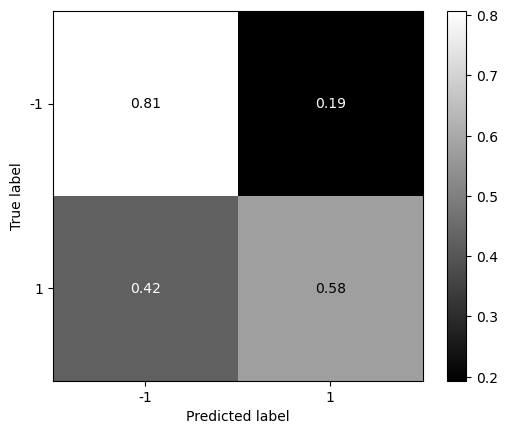

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(train_labels, y_hat, cmap="gray", normalize="true");

### Testset

In [10]:
y_hat = nb.predict(test_projections)

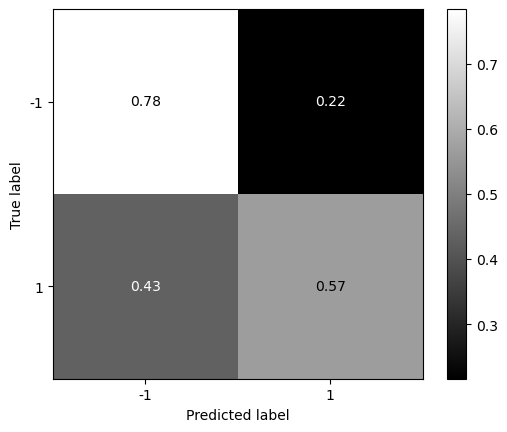

In [11]:
ConfusionMatrixDisplay.from_predictions(test_labels, y_hat, cmap="gray", normalize="true");

In [12]:
tp = np.count_nonzero((test_labels == 1) & (y_hat == 1))
fn = np.count_nonzero((test_labels == 1) & (y_hat == -1))

tp / (tp + fn)

0.5660377358490566

In [14]:
%load_ext version_information

In [15]:
%version_information numpy, matplotlib

Software versions
Python 3.10.6 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.4.0
OS Windows 10 10.0.19044 SP0
numpy 1.23.3
matplotlib 3.5.2
Sat Nov 12 08:58:06 2022 Mitteleuropäische Zeit